In [1]:
from pyckmeans import MultiCKMeans
import sklearn.datasets
import math
import pandas as pd
# import tensorflow as tf
# # import keras_tuner.tuners as kt
import matplotlib.pyplot as plt
# import keras
# from tensorflow.keras import Model
# from tensorflow.keras import Sequential
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.layers import Dense, Dropout
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.losses import MeanSquaredLogarithmicError
import numpy as np
import pickle
np.random.seed(37)
# from tensorflow.keras import Input
# from tensorflow.keras.layers import Conv1D, Conv2D, LeakyReLU, MaxPool1D, AveragePooling1D, UpSampling1D, Flatten, Dense, Reshape, BatchNormalization
# # https://towardsdatascience.com/improve-your-model-performance-with-auto-encoders-d4ee543b4154
# from tensorflow.keras import initializers
# from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import GridSearchCV
# from scipy.stats import multivariate_normal
# from keras.optimizers import Adam, SGD, Adadelta


In [2]:
x_train_scaled = pd.read_csv('../data/260_sample_train_scaled.csv').set_index("Patient_ID")
x_train_scaled

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,PPP1R17,WNT8A,LSM5,PCDHB3,GUSBP11,C16orf78,C5orf17,LOC100132831,LOC100288778,LOC100505851
Patient_ID,,,,,,,,,,,,,,,,,,,,,
55_control,0.702813,0.799052,0.719665,0.729547,0.794953,0.256451,1.000000,0.363133,0.374212,0.611161,...,0.932722,0.806913,0.653998,0.860533,0.837016,1.0,0.550415,0.000000,0.778617,0.940755
168_CD_plain,0.751408,0.603707,0.622768,0.627712,0.606860,0.520576,0.311962,0.251356,0.553554,0.441131,...,0.000000,0.000000,0.692339,0.578107,0.619998,0.0,0.000000,0.000000,0.607899,0.206271
72_control,0.786508,0.755331,0.739605,0.756170,0.819875,0.391132,0.648401,0.134017,0.200420,0.679453,...,0.000000,0.505180,0.644769,0.603195,0.756754,0.0,0.350566,0.000000,0.899508,0.014040
120_control,0.707491,0.662993,0.648072,0.764621,0.654276,0.633929,0.579519,0.248934,0.759250,0.755407,...,0.000000,0.000000,0.131632,0.053179,0.774455,0.0,0.000000,0.000000,0.528882,0.305806
258_CD_plain,0.701039,0.662511,0.707208,0.834562,0.670160,0.410612,0.370517,0.244987,0.445387,0.798000,...,0.000000,0.000000,0.085440,0.761822,0.860355,0.0,0.000000,0.000000,0.604102,0.014040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15_CD_plain,0.382762,0.384030,0.377332,0.360165,0.300915,0.340090,0.077348,0.890965,0.261140,0.205779,...,0.000000,0.000000,0.149005,0.740343,0.641698,0.0,0.000000,0.694951,0.485461,0.300471
182_CD_plain,0.679910,0.584723,0.722426,0.643867,0.740014,0.650358,0.468650,0.295686,0.649939,0.609862,...,0.000000,0.000000,0.229358,0.640000,0.731908,0.0,0.422815,0.096205,0.502320,0.615334
164_CD_plain,0.754656,0.556562,0.694062,0.748334,0.535534,0.133869,0.319071,0.154562,0.440487,0.824013,...,0.000000,0.000000,0.211405,0.797333,0.896369,0.0,0.234352,0.000000,0.496177,0.402714


In [3]:
x_test_scaled = pd.read_csv('../data/260_sample_test_scaled.csv').set_index("Patient_ID")
x_test_scaled

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,PPP1R17,WNT8A,LSM5,PCDHB3,GUSBP11,C16orf78,C5orf17,LOC100132831,LOC100288778,LOC100505851
Patient_ID,,,,,,,,,,,,,,,,,,,,,
253_CD_plain,0.869185,0.841880,0.930171,0.886737,0.835678,0.297964,0.668498,0.266670,0.278122,0.933520,...,0.00000,0.0,0.016890,0.754178,0.816832,0.0,0.214180,0.000000,0.627881,0.014040
105_CD_plain,0.853562,0.933532,0.942213,0.794578,0.890482,0.206529,0.298987,0.350745,0.495663,0.849038,...,0.00000,0.0,0.380373,0.659297,0.789071,0.0,0.000000,0.296100,0.763348,0.354178
2_CD_plain,0.165531,0.141475,0.263684,0.198091,0.160503,0.888878,0.000000,0.134461,0.989132,0.202203,...,0.68115,0.0,0.127947,1.009412,0.582660,0.0,0.000000,0.473139,0.277717,0.014040
184_CD_plain,0.717121,0.660314,0.769417,0.752737,0.694874,0.514735,0.692365,0.271127,0.650742,0.694599,...,0.00000,0.0,0.203518,0.723574,0.696147,0.0,0.000000,0.000000,0.646765,0.450394
312_CD_plain,0.730072,0.722909,0.713076,0.743545,0.679258,0.308459,0.399235,0.129019,0.597529,0.720390,...,0.00000,0.0,0.214416,0.496175,0.803259,0.0,0.236722,0.000000,0.534480,0.304870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,0.736123,0.658232,0.772323,0.685637,0.658755,0.250970,0.247307,0.422075,0.555944,0.603675,...,0.00000,0.0,0.357494,0.782257,0.591442,0.0,0.000000,0.431213,0.465159,0.540147
279_CD_plain,0.220614,0.202090,0.182810,0.113245,0.105744,0.699851,0.000000,0.908485,0.688912,0.178259,...,0.00000,0.0,0.418615,0.949858,0.559052,0.0,0.269991,0.410777,0.361163,0.561191
179_CD_plain,0.724476,0.726774,0.766943,0.776284,0.690339,0.380637,0.440449,0.318944,0.558600,0.738787,...,0.00000,0.0,0.105689,0.683222,0.878635,0.0,0.182111,0.650452,0.568842,0.398252


In [4]:
full_ds = pd.concat([x_train_scaled, x_test_scaled])
full_ds

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,PPP1R17,WNT8A,LSM5,PCDHB3,GUSBP11,C16orf78,C5orf17,LOC100132831,LOC100288778,LOC100505851
Patient_ID,,,,,,,,,,,,,,,,,,,,,
55_control,0.702813,0.799052,0.719665,0.729547,0.794953,0.256451,1.000000,0.363133,0.374212,0.611161,...,0.932722,0.806913,0.653998,0.860533,0.837016,1.0,0.550415,0.000000,0.778617,0.940755
168_CD_plain,0.751408,0.603707,0.622768,0.627712,0.606860,0.520576,0.311962,0.251356,0.553554,0.441131,...,0.000000,0.000000,0.692339,0.578107,0.619998,0.0,0.000000,0.000000,0.607899,0.206271
72_control,0.786508,0.755331,0.739605,0.756170,0.819875,0.391132,0.648401,0.134017,0.200420,0.679453,...,0.000000,0.505180,0.644769,0.603195,0.756754,0.0,0.350566,0.000000,0.899508,0.014040
120_control,0.707491,0.662993,0.648072,0.764621,0.654276,0.633929,0.579519,0.248934,0.759250,0.755407,...,0.000000,0.000000,0.131632,0.053179,0.774455,0.0,0.000000,0.000000,0.528882,0.305806
258_CD_plain,0.701039,0.662511,0.707208,0.834562,0.670160,0.410612,0.370517,0.244987,0.445387,0.798000,...,0.000000,0.000000,0.085440,0.761822,0.860355,0.0,0.000000,0.000000,0.604102,0.014040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,0.736123,0.658232,0.772323,0.685637,0.658755,0.250970,0.247307,0.422075,0.555944,0.603675,...,0.000000,0.000000,0.357494,0.782257,0.591442,0.0,0.000000,0.431213,0.465159,0.540147
279_CD_plain,0.220614,0.202090,0.182810,0.113245,0.105744,0.699851,0.000000,0.908485,0.688912,0.178259,...,0.000000,0.000000,0.418615,0.949858,0.559052,0.0,0.269991,0.410777,0.361163,0.561191
179_CD_plain,0.724476,0.726774,0.766943,0.776284,0.690339,0.380637,0.440449,0.318944,0.558600,0.738787,...,0.000000,0.000000,0.105689,0.683222,0.878635,0.0,0.182111,0.650452,0.568842,0.398252


In [5]:
# gene_df_shap = pd.DataFrame(shap_values[2], index=x_test_scaled.index, columns = x_test_scaled.columns)
df_cd_deep = full_ds[full_ds.index.str.endswith('_CD_deep_ulcer')]
df_cd_plain = full_ds[full_ds.index.str.endswith('_CD_plain')]
df_control = full_ds[full_ds.index.str.endswith('_control')]
df_cd_deep

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,PPP1R17,WNT8A,LSM5,PCDHB3,GUSBP11,C16orf78,C5orf17,LOC100132831,LOC100288778,LOC100505851
Patient_ID,,,,,,,,,,,,,,,,,,,,,
254_CD_deep_ulcer,0.688952,0.790972,0.730387,0.698611,0.814798,0.539765,0.476091,0.531103,0.643682,0.557025,...,0.000000,0.0,0.345557,0.977299,0.857707,0.0,0.000000,0.000000,0.981962,0.014040
216_CD_deep_ulcer,0.392511,0.306222,0.540222,0.462697,0.430877,0.751154,0.073092,0.495681,0.926051,0.333960,...,0.430252,0.0,0.151754,0.745600,0.806073,0.0,0.000000,0.100151,0.500584,0.014040
263_CD_deep_ulcer,0.269897,0.214387,0.187335,0.158953,0.180396,0.856687,0.000000,0.274659,0.916233,0.329184,...,0.143543,0.0,0.067179,0.700859,0.890089,0.0,0.000000,0.376466,0.571121,0.033752
95_CD_deep_ulcer,0.322076,0.317311,0.295913,0.189476,0.222371,0.635286,0.186784,0.809517,0.583656,0.224686,...,0.000000,0.0,0.486607,0.601964,0.860680,0.0,0.000000,0.221262,0.809683,0.014040
223_CD_deep_ulcer,0.697044,0.615143,0.670016,0.731387,0.602704,0.613085,0.000000,0.321284,0.676704,0.632284,...,0.000000,0.0,0.278193,0.636968,0.729221,0.0,0.213308,0.000000,0.444794,0.045012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145_CD_deep_ulcer,0.580654,0.316558,0.463705,0.469550,0.382367,0.548972,0.146997,0.372269,0.697253,0.267339,...,0.000000,0.0,0.321706,0.706920,0.773461,0.0,0.032108,0.000000,0.692775,0.534324
143_CD_deep_ulcer,0.524637,0.358230,0.463575,0.519032,0.484028,0.641028,0.171927,0.547367,0.820735,0.317961,...,0.000000,0.0,0.251423,0.519011,0.846744,0.0,0.000000,0.169754,0.751005,0.191430
165_CD_deep_ulcer,0.631350,0.589925,0.672493,0.684450,0.603240,0.642262,0.547043,0.142334,0.726706,0.604319,...,0.000000,0.0,0.142216,0.569163,0.889357,0.0,0.000000,0.034570,0.545153,0.014040


In [6]:
with open("../data/models/shap/all_dep_2p11_1p5", "rb") as fp:   # Unpickling
    shap_values = pickle.load(fp)

In [7]:
shap_values = shap_values[0]

In [8]:
gene_df_shap = pd.DataFrame(shap_values[1], index=x_test_scaled.index, columns = x_test_scaled.columns) # CD deep ulcer shap values
df_train_cd_deep_shap = gene_df_shap[gene_df_shap.index.str.endswith('_CD_deep_ulcer')]
df_train_cd_plain_shap = gene_df_shap[gene_df_shap.index.str.endswith('_CD_plain')]
df_train_control_shap = gene_df_shap[gene_df_shap.index.str.endswith('_control')]
df_train_cd_deep_shap.describe()

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,PPP1R17,WNT8A,LSM5,PCDHB3,GUSBP11,C16orf78,C5orf17,LOC100132831,LOC100288778,LOC100505851
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,0.951922,1.880119,0.599366,-0.732064,2.405496,-0.707159,0.244907,1.497514,-0.211846,0.223497,...,-1.437383,-0.020342,0.955457,-1.660411,0.654793,-2.291076,-0.369656,0.020298,0.954298,-1.903214
std,4.269515,7.748022,4.715593,3.262318,7.617677,6.914758,2.053713,4.859315,4.692337,7.247410,...,5.102283,4.289057,6.931156,6.108291,8.650941,5.770782,1.969324,4.774261,4.092765,6.533537
min,-4.891804,-8.186150,-9.330756,-10.638097,-8.301936,-17.418159,-4.818856,-7.242980,-18.156535,-23.893423,...,-20.641581,-13.572699,-11.294193,-20.325304,-25.845181,-19.608753,-8.273911,-16.007185,-3.341023,-22.238856
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-0.497682,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.212365,0.000000,0.000000,0.000000,0.000000,0.000000,-1.230296
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.255562,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.379020,0.000000,0.000000,0.000000,0.000000,0.000000
max,17.562899,34.995631,14.066655,4.908958,25.818515,17.032664,7.650425,15.182342,12.309436,23.225343,...,3.624629,11.338638,28.133121,8.230275,20.492069,2.923918,3.153804,12.156612,15.452285,13.169629


# CD Deep Ulcer

# Pre-processing dataset

In [9]:
gene_shap_means = df_train_cd_plain_shap.describe().loc["mean"].values
gene_shap_means_abs = np.abs(gene_shap_means)


In [10]:
full_exp_df = full_ds.copy()
full_exp_df

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,PPP1R17,WNT8A,LSM5,PCDHB3,GUSBP11,C16orf78,C5orf17,LOC100132831,LOC100288778,LOC100505851
Patient_ID,,,,,,,,,,,,,,,,,,,,,
55_control,0.702813,0.799052,0.719665,0.729547,0.794953,0.256451,1.000000,0.363133,0.374212,0.611161,...,0.932722,0.806913,0.653998,0.860533,0.837016,1.0,0.550415,0.000000,0.778617,0.940755
168_CD_plain,0.751408,0.603707,0.622768,0.627712,0.606860,0.520576,0.311962,0.251356,0.553554,0.441131,...,0.000000,0.000000,0.692339,0.578107,0.619998,0.0,0.000000,0.000000,0.607899,0.206271
72_control,0.786508,0.755331,0.739605,0.756170,0.819875,0.391132,0.648401,0.134017,0.200420,0.679453,...,0.000000,0.505180,0.644769,0.603195,0.756754,0.0,0.350566,0.000000,0.899508,0.014040
120_control,0.707491,0.662993,0.648072,0.764621,0.654276,0.633929,0.579519,0.248934,0.759250,0.755407,...,0.000000,0.000000,0.131632,0.053179,0.774455,0.0,0.000000,0.000000,0.528882,0.305806
258_CD_plain,0.701039,0.662511,0.707208,0.834562,0.670160,0.410612,0.370517,0.244987,0.445387,0.798000,...,0.000000,0.000000,0.085440,0.761822,0.860355,0.0,0.000000,0.000000,0.604102,0.014040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,0.736123,0.658232,0.772323,0.685637,0.658755,0.250970,0.247307,0.422075,0.555944,0.603675,...,0.000000,0.000000,0.357494,0.782257,0.591442,0.0,0.000000,0.431213,0.465159,0.540147
279_CD_plain,0.220614,0.202090,0.182810,0.113245,0.105744,0.699851,0.000000,0.908485,0.688912,0.178259,...,0.000000,0.000000,0.418615,0.949858,0.559052,0.0,0.269991,0.410777,0.361163,0.561191
179_CD_plain,0.724476,0.726774,0.766943,0.776284,0.690339,0.380637,0.440449,0.318944,0.558600,0.738787,...,0.000000,0.000000,0.105689,0.683222,0.878635,0.0,0.182111,0.650452,0.568842,0.398252


In [11]:
full_exp_train_proc = full_exp_df.multiply(gene_shap_means_abs, axis='columns').T
full_exp_train_proc

Patient_ID,55_control,168_CD_plain,72_control,120_control,258_CD_plain,254_CD_deep_ulcer,9_CD_plain,111_CD_plain,57_CD_plain,216_CD_deep_ulcer,...,321_CD_plain,12_CD_plain,165_CD_deep_ulcer,286_CD_plain,89_control,107_CD_plain,279_CD_plain,179_CD_plain,70_CD_deep_ulcer,256_CD_deep_ulcer
AADAC,0.242944,0.259742,0.271875,0.244561,0.242330,0.238152,0.216735,0.204569,0.268442,0.135680,...,0.249965,0.284908,0.218241,0.316057,0.316274,0.254458,0.076260,0.250432,0.168799,0.210674
APOA1,0.472969,0.357342,0.447090,0.392434,0.392149,0.468187,0.288210,0.401158,0.459671,0.181257,...,0.393867,0.426055,0.349184,0.545139,0.489482,0.389616,0.119620,0.430187,0.293257,0.354504
APOA4,0.394222,0.341143,0.405145,0.355004,0.387398,0.400096,0.375836,0.343803,0.447964,0.295926,...,0.438669,0.408139,0.368382,0.530882,0.468629,0.423067,0.100140,0.420120,0.314925,0.373617
APOB,0.168375,0.144872,0.174519,0.176470,0.192612,0.161235,0.131144,0.126608,0.158928,0.106788,...,0.166720,0.192540,0.157967,0.214290,0.213222,0.158241,0.026136,0.179162,0.113398,0.176744
APOC3,1.263076,0.964221,1.302673,1.039559,1.064796,1.294606,1.010985,1.065332,1.420167,0.684607,...,1.201894,1.163344,0.958469,1.557238,1.267616,1.046676,0.168013,1.096858,0.858104,1.030143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C16orf78,0.758130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C5orf17,0.352624,0.000000,0.224591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.172970,0.116670,0.176807,0.000000
LOC100132831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.995850,0.000000,0.000000,0.138728,...,0.840245,0.174955,0.047886,1.467275,1.158074,0.597311,0.569003,0.900998,1.236497,0.381840
LOC100288778,0.156679,0.122326,0.181006,0.106426,0.121562,0.197598,0.109106,0.189665,0.183991,0.100731,...,0.071375,0.083270,0.109700,0.160999,0.121123,0.093603,0.072676,0.114467,0.146820,0.099108


In [12]:
# process only for CD deep ulcer
df_cd_deep_proc = df_cd_plain.multiply(gene_shap_means_abs, axis='columns').T
df_cd_deep_proc

Patient_ID,168_CD_plain,258_CD_plain,9_CD_plain,111_CD_plain,57_CD_plain,172_CD_plain,310_CD_plain,68_CD_plain,285_CD_plain,201_CD_plain,...,204_CD_plain,110_CD_plain,56_CD_plain,29_CD_plain,321_CD_plain,12_CD_plain,286_CD_plain,107_CD_plain,279_CD_plain,179_CD_plain
AADAC,0.259742,0.242330,0.216735,0.204569,0.268442,0.158275,0.186361,0.114635,0.249791,0.256534,...,0.257255,0.150605,0.188868,0.279943,0.249965,0.284908,0.316057,0.254458,0.076260,0.250432
APOA1,0.357342,0.392149,0.288210,0.401158,0.459671,0.103682,0.303177,0.187395,0.421330,0.389945,...,0.411411,0.199904,0.307063,0.478494,0.393867,0.426055,0.545139,0.389616,0.119620,0.430187
APOA4,0.341143,0.387398,0.375836,0.343803,0.447964,0.108968,0.297695,0.175979,0.381941,0.375865,...,0.416736,0.211692,0.387226,0.449502,0.438669,0.408139,0.530882,0.423067,0.100140,0.420120
APOB,0.144872,0.192612,0.131144,0.126608,0.158928,0.044623,0.152222,0.059123,0.156314,0.186085,...,0.169157,0.070464,0.120804,0.164043,0.166720,0.192540,0.214290,0.158241,0.026136,0.179162
APOC3,0.964221,1.064796,1.010985,1.065332,1.420167,0.308223,0.836111,0.361170,1.032768,1.011545,...,1.167244,0.586401,0.932579,1.207571,1.201894,1.163344,1.557238,1.046676,0.168013,1.096858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C16orf78,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C5orf17,0.000000,0.000000,0.000000,0.000000,0.000000,0.131048,0.000000,0.049582,0.000000,0.092775,...,0.344929,0.000000,0.000000,0.137320,0.000000,0.000000,0.000000,0.000000,0.172970,0.116670
LOC100132831,0.000000,0.000000,0.995850,0.000000,0.000000,0.143699,0.000000,0.378394,0.119439,0.000000,...,0.000000,0.000000,0.075922,0.178862,0.840245,0.174955,1.467275,0.597311,0.569003,0.900998
LOC100288778,0.122326,0.121562,0.109106,0.189665,0.183991,0.089661,0.117085,0.094943,0.114960,0.152777,...,0.113432,0.090912,0.131718,0.181455,0.071375,0.083270,0.160999,0.093603,0.072676,0.114467


## Consensus KMeans clustering

In [13]:



# simulate dataset
# 50 samples, 10 features, 3 true clusters
# x, _ = sklearn.datasets.make_blobs(n_samples=50, n_features=10, centers=3, random_state=44)

# apply multiple Consensus K-Means for
# k = 2, ..., 5
# 100 K-Means runs per Consensus K-Means
# draw 80% of the sample for each single K-Means
# draw 50% of the features for each single K-Means
mckm = MultiCKMeans(k=[2, 3, 4, 5, 6, 7, 8, 9], n_rep=100, p_samp=0.8, p_feat=0.5)
mckm.fit(full_exp_train_proc.values)
mckm_res_train = mckm.predict(full_exp_train_proc.values)
# mckm_res_test = mckm.predict(gene_exp_test_proc.values)



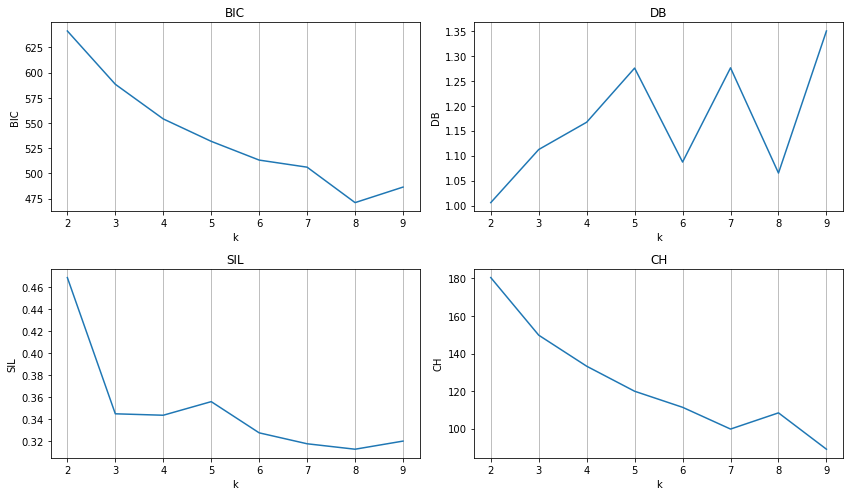

In [14]:
pl = mckm_res_train.plot_metrics(figsize=(12, 7))

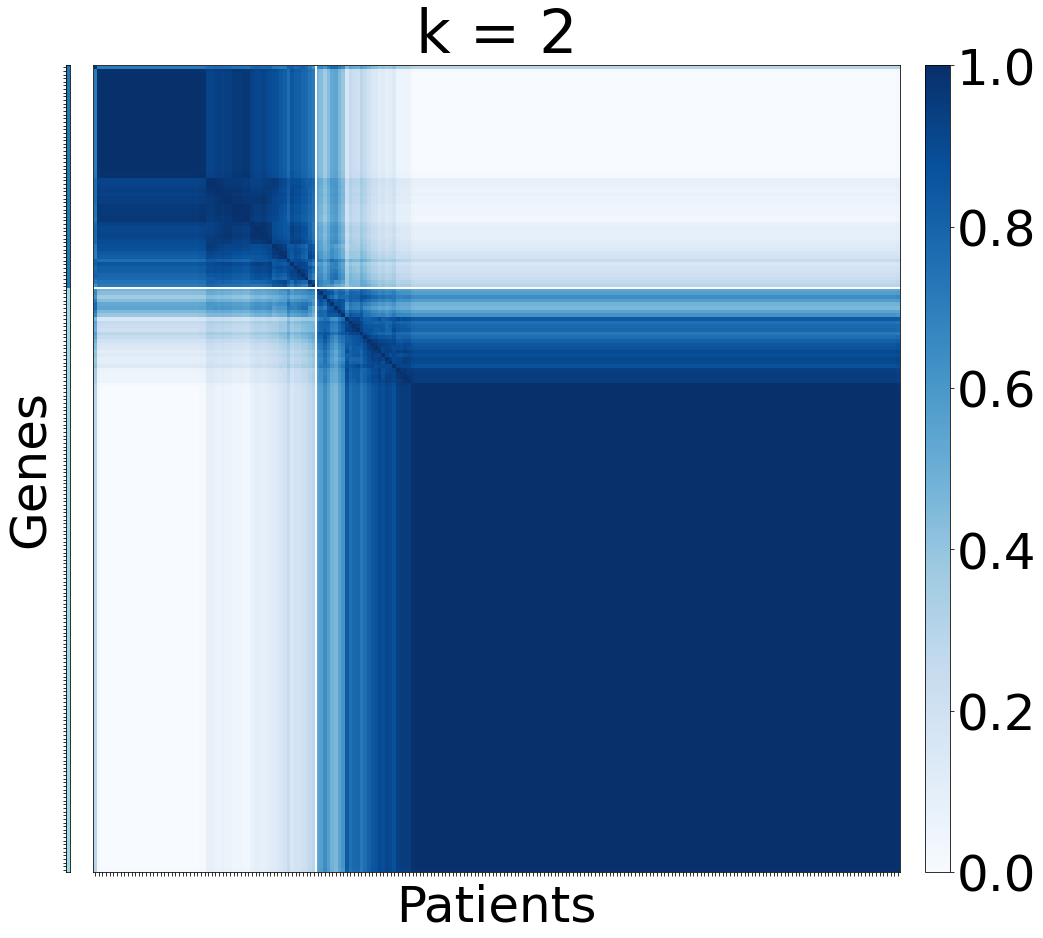

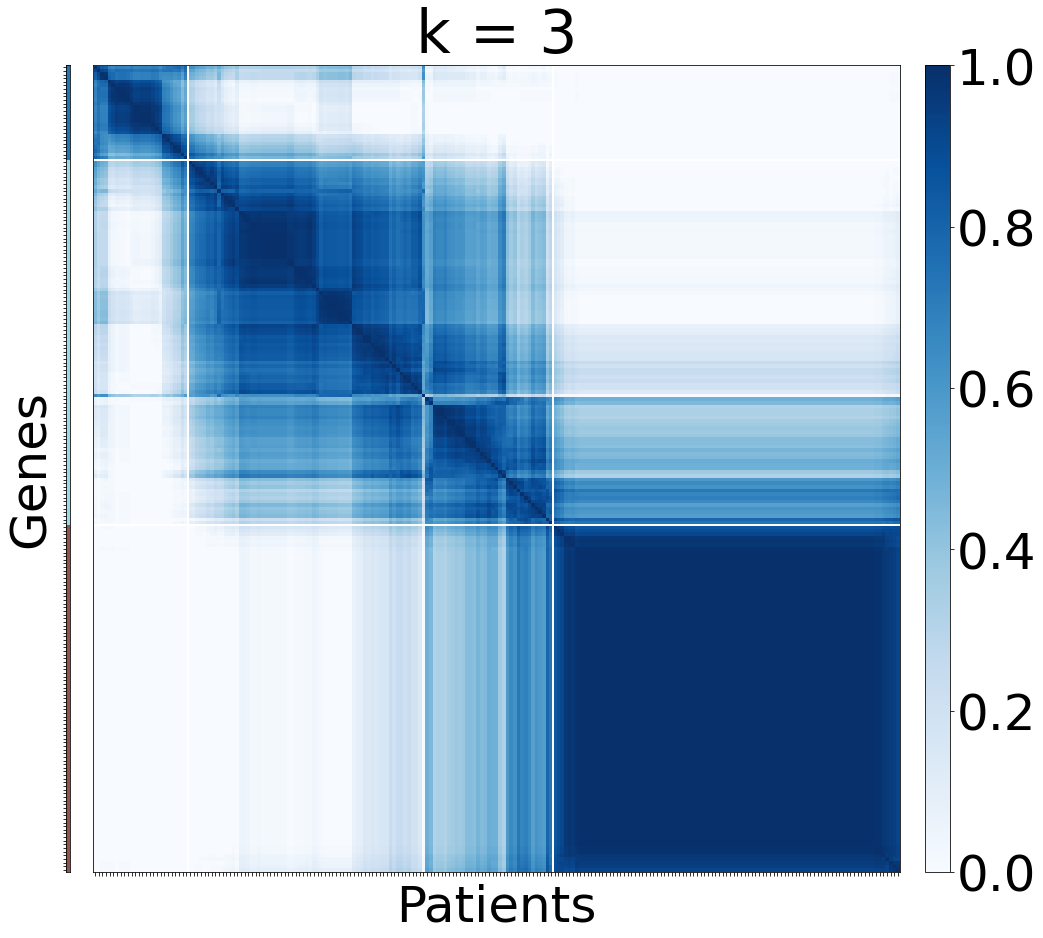

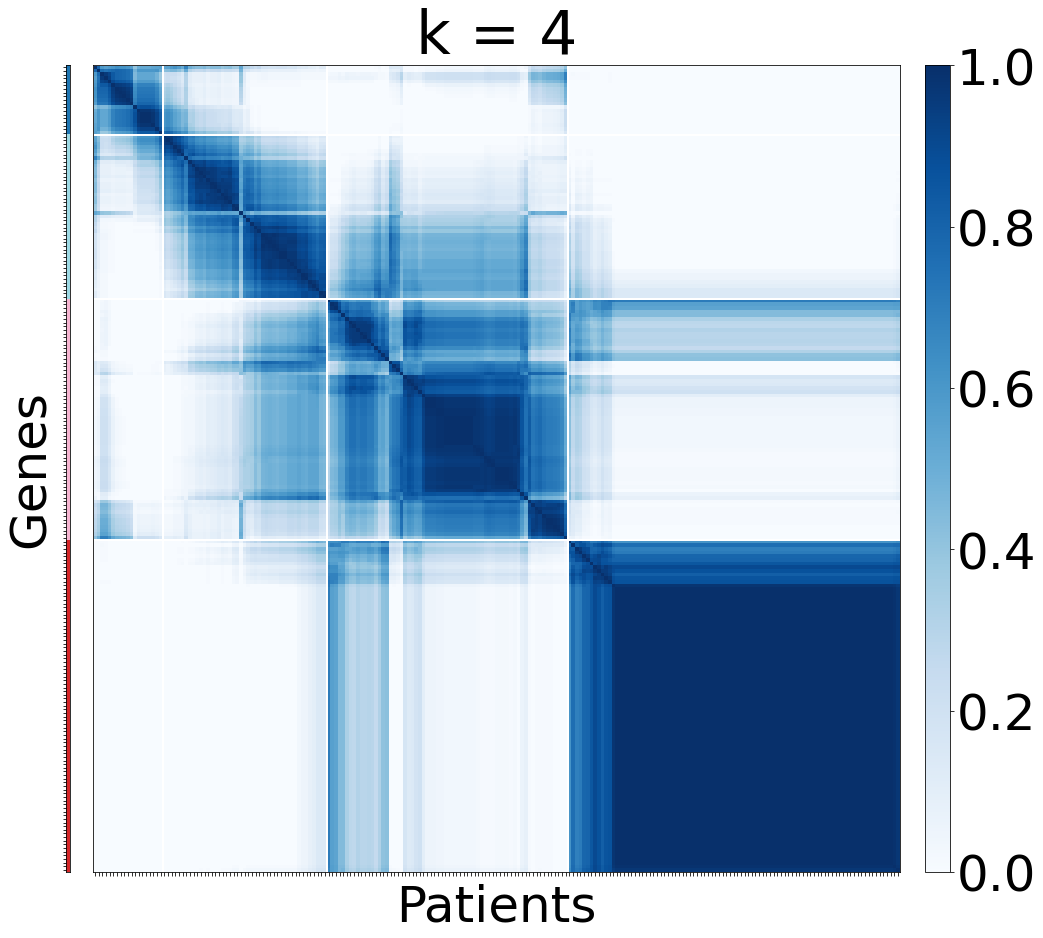

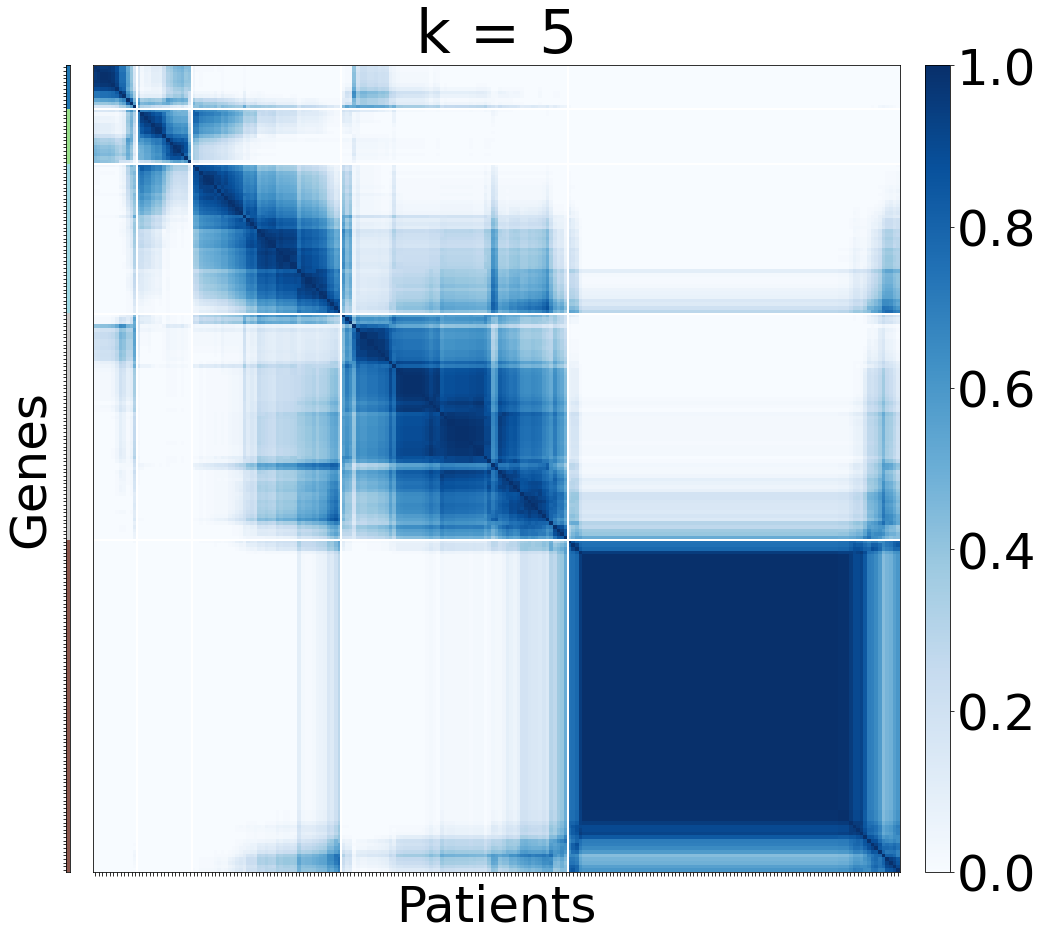

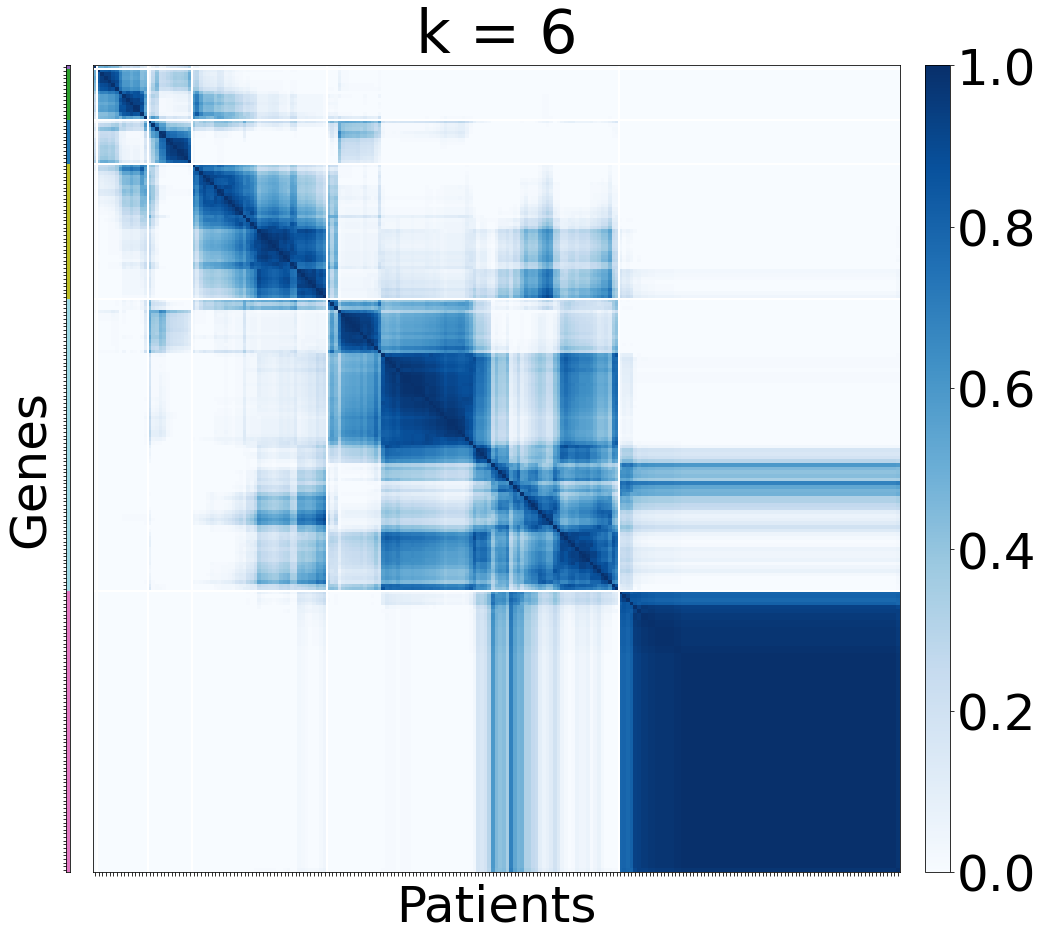

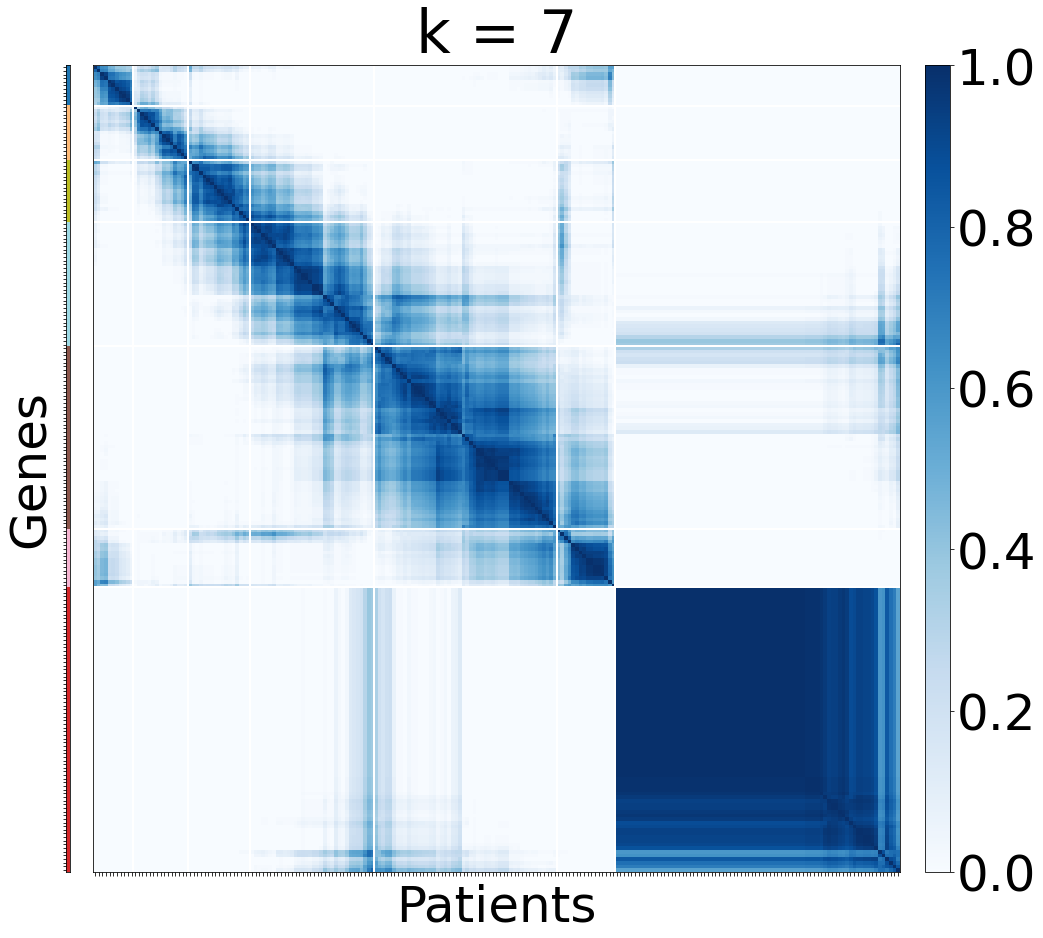

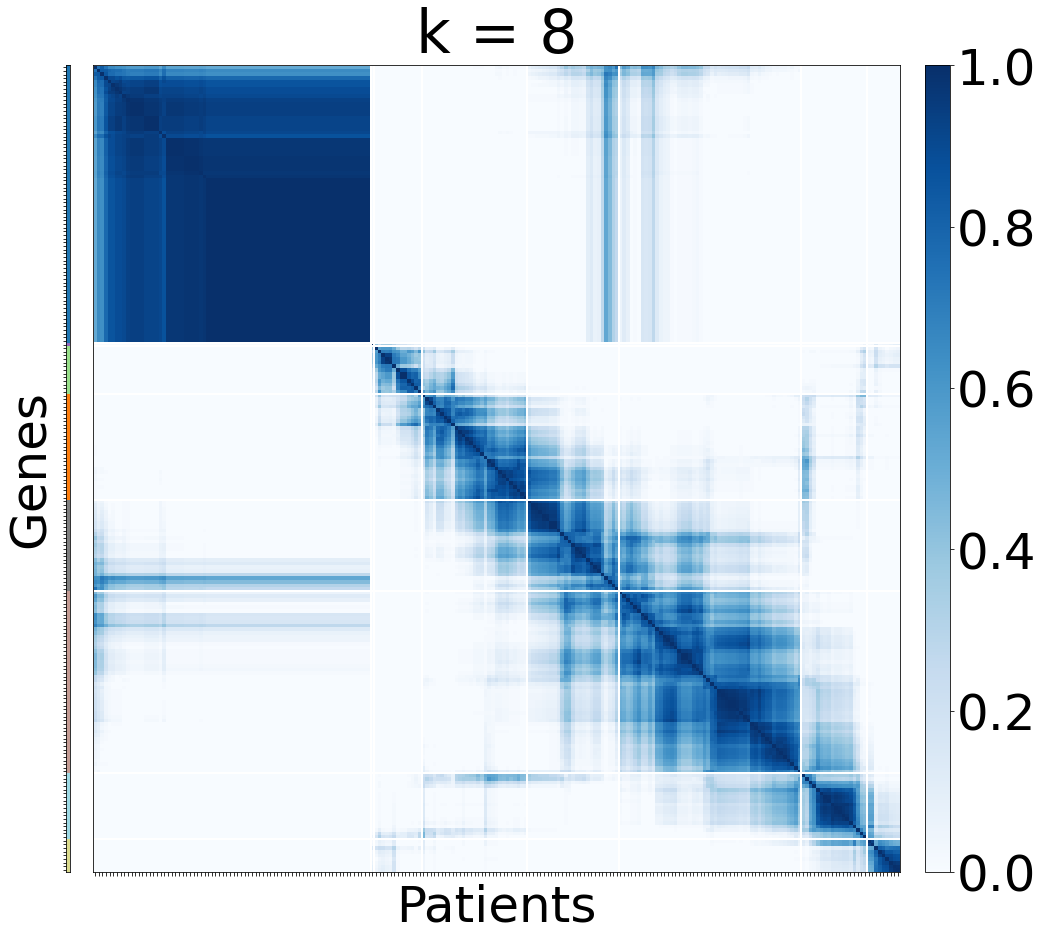

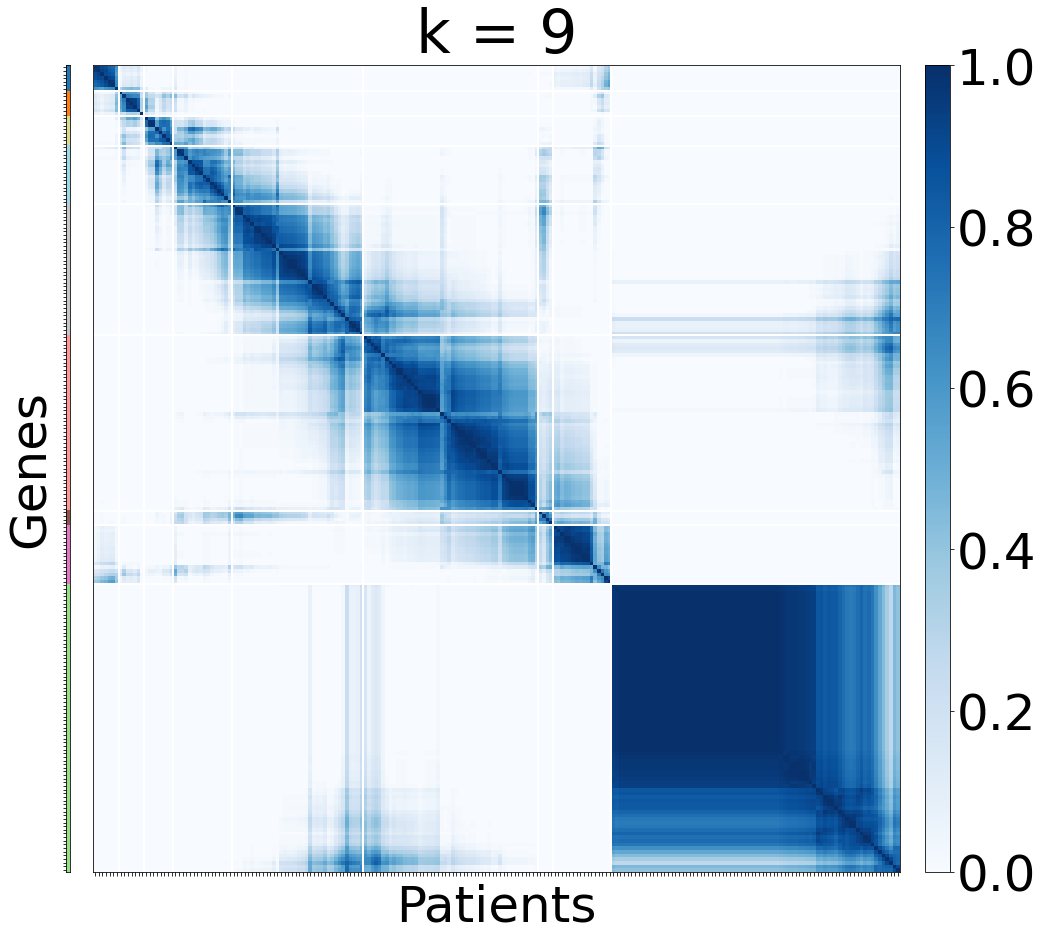

In [15]:
plt.rcParams.update({'font.size': 50})

# Select a 'good' K
# At k values around 7, BIC, DB, and SIL have a (local) optimum
# ckm_res_k7 = mckm_res_train.ckmeans_results[1]
# fig = ckm_res_k7.plot(figsize=(14,14))

for i, ckm_res in enumerate(mckm_res_train.ckmeans_results):
    fig = ckm_res.plot(figsize=(14,14))
#     print("k =", i+2)
    fig.axes[0].set_xticklabels('')
    fig.axes[1].set_yticklabels('')
    fig.axes[0].set_xlabel("Patients")
    fig.axes[1].set_ylabel("Genes")
    fig.axes[0].set_title("k = "+ str(i+2))
    plt.show()

In [16]:
# clustering metrics and plots for all k
print('Metrics:')
print(mckm_res_train.metrics)


Metrics:
   k       sil         bic        db          ch
0  2  0.468776  641.328698  1.005865  180.462248
1  3  0.345038  588.464179  1.112265  149.792727
2  4  0.343730  554.084059  1.166975  133.271671
3  5  0.356088  531.846527  1.275428  119.938928
4  6  0.327739  513.247295  1.087161  111.393697
5  7  0.317810  506.212688  1.275957   99.807249
6  8  0.312864  471.051120  1.065080  108.432338
7  9  0.320244  486.469305  1.349783   89.072268


In [43]:
# best k:
k = 4
ckm_res = mckm_res_train.ckmeans_results[k-2]

cd_plain_clusters = ckm_res.cl
print('Cluster Membership:', cd_plain_clusters)
cd_plain_clusters.shape

Cluster Membership: [1 2 2 1 0 3 2 3 1 0 2 2 2 1 3 1 1 2 3 3 3 3 1 1 1 2 1 3 2 1 2 2 2 2 2 0 3
 2 1 1 3 2 1 1 1 3 2 1 2 3 1 3 0 0 2 1 3 1 3 3 3 1 1 3 3 1 1 2 1 0 3 3 1 1
 3 0 2 3 1 2 2 1 2 2 1 2 0 2 3 1 2 2 3 0 1 0 1 1 3 1 1 1 2 1 2 2 2 3 1 3 2
 2 1 1 2 2 2 1 2 2 3 2 1 3 1 1 1 0 3 2 0 1 2 3 3 0 2 2 1 1 1 1 1 1 3 1 1 1
 0 2 0 2 3 3 1 1 2 2 2 0 3 3 2 3 1 2 1 1 3 1 3 1 1 1 1 1 3 1 0 1 1 2 1 2 1
 1 2 1 0 2 2 3 1 2 1 1 2 0 1 3 2 2 3 1 1 2 1 2 1 2 1 1 1 1 1 2 1 1 2 1 1]


(221,)

## Aggregate bar plot, showing potential gene modules alongside SHAP contributions for CD deep ulcer patients

In [44]:
cd_plain_clusters

array([1, 2, 2, 1, 0, 3, 2, 3, 1, 0, 2, 2, 2, 1, 3, 1, 1, 2, 3, 3, 3, 3,
       1, 1, 1, 2, 1, 3, 2, 1, 2, 2, 2, 2, 2, 0, 3, 2, 1, 1, 3, 2, 1, 1,
       1, 3, 2, 1, 2, 3, 1, 3, 0, 0, 2, 1, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1,
       1, 2, 1, 0, 3, 3, 1, 1, 3, 0, 2, 3, 1, 2, 2, 1, 2, 2, 1, 2, 0, 2,
       3, 1, 2, 2, 3, 0, 1, 0, 1, 1, 3, 1, 1, 1, 2, 1, 2, 2, 2, 3, 1, 3,
       2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 3, 2, 1, 3, 1, 1, 1, 0, 3, 2, 0, 1,
       2, 3, 3, 0, 2, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 2, 0, 2, 3, 3,
       1, 1, 2, 2, 2, 0, 3, 3, 2, 3, 1, 2, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1,
       3, 1, 0, 1, 1, 2, 1, 2, 1, 1, 2, 1, 0, 2, 2, 3, 1, 2, 1, 1, 2, 0,
       1, 3, 2, 2, 3, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1], dtype=int32)

In [45]:
shap_df = df_train_cd_plain_shap.describe().T
shap_df["cluster_num"] = cd_plain_clusters
shap_df["gene_symbol"] = shap_df.index
shap_df

,count,mean,std,min,25%,50%,75%,max,cluster_num,gene_symbol
AADAC,41.0,0.345673,4.203760,-12.179536,0.0,0.0,0.000000,16.377362,1,AADAC
APOA1,41.0,-0.591913,5.686433,-20.318063,0.0,0.0,0.000000,16.547418,2,APOA1
APOA4,41.0,-0.547785,5.226264,-15.893364,0.0,0.0,0.000000,16.575335,2,APOA4
APOB,41.0,-0.230794,6.822834,-19.829499,0.0,0.0,0.000000,23.702695,1,APOB
APOC3,41.0,1.588869,7.940205,-13.496632,0.0,0.0,0.000000,39.958899,0,APOC3
...,...,...,...,...,...,...,...,...,...,...
C16orf78,41.0,-0.758130,6.753717,-14.436872,0.0,0.0,0.000000,30.443725,1,C16orf78
C5orf17,41.0,-0.640651,5.564693,-15.784415,0.0,0.0,0.000000,14.225277,1,C5orf17
LOC100132831,41.0,1.385188,6.065695,-16.956323,0.0,0.0,4.502434,13.711012,2,LOC100132831
LOC100288778,41.0,-0.201227,6.267123,-17.848788,0.0,0.0,0.000000,18.035998,1,LOC100288778


In [46]:
shap_df["cluster_num"].values

array([1, 2, 2, 1, 0, 3, 2, 3, 1, 0, 2, 2, 2, 1, 3, 1, 1, 2, 3, 3, 3, 3,
       1, 1, 1, 2, 1, 3, 2, 1, 2, 2, 2, 2, 2, 0, 3, 2, 1, 1, 3, 2, 1, 1,
       1, 3, 2, 1, 2, 3, 1, 3, 0, 0, 2, 1, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1,
       1, 2, 1, 0, 3, 3, 1, 1, 3, 0, 2, 3, 1, 2, 2, 1, 2, 2, 1, 2, 0, 2,
       3, 1, 2, 2, 3, 0, 1, 0, 1, 1, 3, 1, 1, 1, 2, 1, 2, 2, 2, 3, 1, 3,
       2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 3, 2, 1, 3, 1, 1, 1, 0, 3, 2, 0, 1,
       2, 3, 3, 0, 2, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 2, 0, 2, 3, 3,
       1, 1, 2, 2, 2, 0, 3, 3, 2, 3, 1, 2, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1,
       3, 1, 0, 1, 1, 2, 1, 2, 1, 1, 2, 1, 0, 2, 2, 3, 1, 2, 1, 1, 2, 0,
       1, 3, 2, 2, 3, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1], dtype=int32)

In [47]:
shap_df.loc["SRSF4"]

count                41
mean          -0.655733
std             5.84127
min            -19.9354
25%                   0
50%                   0
75%                   0
max             15.1022
cluster_num           2
gene_symbol       SRSF4
Name: SRSF4, dtype: object

In [48]:
mean_df = shap_df[['mean','cluster_num','gene_symbol']]
mean_df

,mean,cluster_num,gene_symbol
AADAC,0.345673,1,AADAC
APOA1,-0.591913,2,APOA1
APOA4,-0.547785,2,APOA4
APOB,-0.230794,1,APOB
APOC3,1.588869,0,APOC3
...,...,...,...
C16orf78,-0.758130,1,C16orf78
C5orf17,-0.640651,1,C5orf17
LOC100132831,1.385188,2,LOC100132831
LOC100288778,-0.201227,1,LOC100288778


In [49]:
mean_df.loc["SRSF4"]

mean          -0.655733
cluster_num           2
gene_symbol       SRSF4
Name: SRSF4, dtype: object

In [50]:
def group_fn(data):
    d = {}
    mean_vals = data['mean']
    symbols = list(data['gene_symbol'])
#     print(mean_vals)
#     print(symbols)
    mean_dict = {symbols[i]: abs(mean_vals[i]) for i in range(len(symbols))}
#     print(mean_dict)
    gene_dict = dict(sorted(mean_dict.items(), key=lambda x : x[1], reverse=True))
    gene_list = list(gene_dict.keys())
#     print(gene_list)
    d['sum'] = np.sum(data['mean'])
    d['gene_count'] = data['mean'].count()
    d['grouped_genes'] = gene_list
    return pd.Series(d)

def group_labels(x):
    if len(x) > 4:
        gene_list = x[:4]
    else:
        gene_list = x
    return ", ".join(gene_list)

def add_other(num, curr_label, max_display=4):
#     print(type(num))
#     print(type(curr_label))
    if num > 1:
        if num > 2: 
            other = " others" 
            num_displayed = min(num, max_display)
        else:
            num_displayed = 2
            other = " other"
        rem = num - num_displayed
        if rem == 0:
            return curr_label
        return curr_label + " + " + str(rem) + other
    else:
        return curr_label

In [51]:
agg_df = mean_df.groupby(['cluster_num'])
agg_df = agg_df.apply(group_fn)
agg_df

,sum,gene_count,grouped_genes
cluster_num,,,
0,6.592918,19,"[TNNT2, CHST4, IL23R, RGS13, NAT8B, DACT3, CXC..."
1,2.104649,91,"[LOC286114, C7orf57, WNT8A, LSM5, BPIFB1, LOC1..."
2,-7.410586,66,"[IL10RB, C6, FAM127B, LOC100132831, TCF7L2, FA..."
3,4.746141,45,"[FPR1, CEACAM7, OSM, CLEC4D, NOD2, FCGR3A, NIN..."


In [52]:
agg_df["cluster_labels"] = agg_df["grouped_genes"].apply(group_labels)
# agg_df["cluster_labels"] = agg_df["count"].apply(add_other)

agg_df['cluster_labels'] = agg_df.apply(lambda x: add_other(x["gene_count"], x["cluster_labels"]), axis=1)
agg_df

,sum,gene_count,grouped_genes,cluster_labels
cluster_num,,,,
0,6.592918,19,"[TNNT2, CHST4, IL23R, RGS13, NAT8B, DACT3, CXC...","TNNT2, CHST4, IL23R, RGS13 + 15 others"
1,2.104649,91,"[LOC286114, C7orf57, WNT8A, LSM5, BPIFB1, LOC1...","LOC286114, C7orf57, WNT8A, LSM5 + 87 others"
2,-7.410586,66,"[IL10RB, C6, FAM127B, LOC100132831, TCF7L2, FA...","IL10RB, C6, FAM127B, LOC100132831 + 62 others"
3,4.746141,45,"[FPR1, CEACAM7, OSM, CLEC4D, NOD2, FCGR3A, NIN...","FPR1, CEACAM7, OSM, CLEC4D + 41 others"


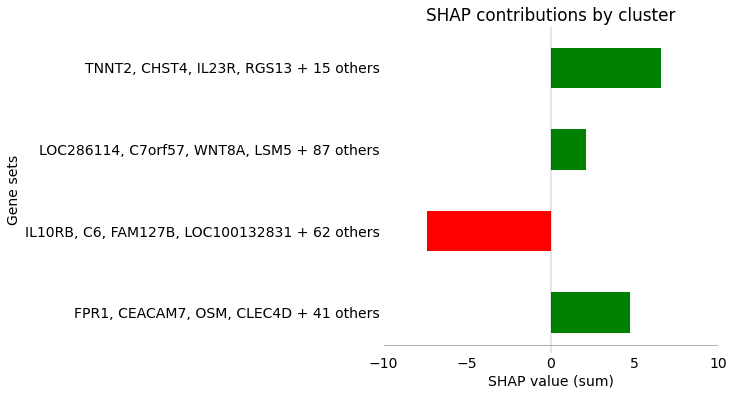

In [53]:
plt.rcParams.update({'font.size': 14})
plt.rcParams["figure.figsize"] = (6,6)
agg_df.plot.barh(x="cluster_labels", y="sum", legend=None, zorder=2, color=(agg_df['sum'] > 0).map({True: 'g',False: 'r'}))

plt.title('SHAP contributions by cluster')
plt.ylabel('Gene sets')
plt.xlabel('SHAP value (sum)')
plt.xlim((-10, 10))
for i, v in enumerate(agg_df["sum"]):
    v = np.round(v, 3)
    vt = "+{:.3f}".format(v) if v >= 0 else "{:.3f}".format(v)
    offset = -.13 if v < 0 else .02
    colour = 'darkred' if v < 0 else 'darkgreen'
#     plt.text(v + offset, i + .08, vt, color=colour, zorder=3)
#     plt.axhline(i,linewidth=.07, color='k', zorder=1, linestyle='--')
    

fig.set_dpi(100)
plt.axvline(0,linewidth=.2, color='k')
size = fig.get_size_inches()[1]
plt.axhline(3.4,linewidth=.9, color='darkgrey')

plt.tick_params(axis=u'both', which=u'both',length=0)
plt.gca().invert_yaxis()
plt.box(on=False)

plt.show()

In [54]:
agg_df["grouped_genes"]

cluster_num
0    [TNNT2, CHST4, IL23R, RGS13, NAT8B, DACT3, CXC...
1    [LOC286114, C7orf57, WNT8A, LSM5, BPIFB1, LOC1...
2    [IL10RB, C6, FAM127B, LOC100132831, TCF7L2, FA...
3    [FPR1, CEACAM7, OSM, CLEC4D, NOD2, FCGR3A, NIN...
Name: grouped_genes, dtype: object

In [55]:
for li in agg_df["grouped_genes"]:
    print(len(li),"genes:")
    for item in li:
        print(item)
    print("----------------------")

19 genes:
TNNT2
CHST4
IL23R
RGS13
NAT8B
DACT3
CXCL6
AGXT2
APOC3
SLC5A12
TLR4
SLC22A4
LCT
ABCC2
LTA
TLR1
HLA_DRB1
FAM151A
ATG16L1
----------------------
91 genes:
LOC286114
C7orf57
WNT8A
LSM5
BPIFB1
LOC147646
IL10
TM4SF19
IRGM
C16orf78
NCRUPAR
CLEC5A
C5orf17
LOC100505851
OR2M3
SLC11A1
LEPREL1
CRP
LAMC3
CHI3L1
LOC339166
PTPN2
DUOX2
HSPA7
CXCR2
PPP1R17
REG1P
MMP1
PUM2
FCRL3
CLDN8
HCAR3
CYP3A7
MUC2
AADAC
FHIT
SHISA2
SELE
EFNB1
RNF24
PCDHB3
FAM92A3
CXCR1
FCN1
CLVS1
TIMM50
G6PC
FXYD5
DHDH
FCGR1C
STAT3
SLC34A3
APOB
TNFAIP3
TPMT
LOC100288778
CYP3A4
TTTY5
SLC5A4
FDCSP
GSTA5
S100A12
LOC392364
SRRD
KCNJ15
DUOXA2
TNFAIP6
LYPD1
TNF
PTPN22
TLR2
SLC28A2
TM4SF4
OTOP2
SUSD2
GLT1D1
IL12B
CDHR1
MIF
MUC1
GCM2
SLC5A11
IL1B
FOXD1
FOLH1
HSD11B1
XPNPEP2
CPO
PNLIPRP2
SAA1
GPR89B
----------------------
66 genes:
IL10RB
C6
FAM127B
LOC100132831
TCF7L2
FANCF
CRIP1
LOC283299
FABP6
ZNF365
FLJ35424
SLC22A5
SERPINA9
GSTA1
SLC13A1
FCRL4
HMGCS2
MS4A10
GUCA2B
SLC10A2
TYK2
ACYP2
CNR1
TCF4
CNTFR
MGAM
LYPLAL1
CYP4F11
SHBG
T

## Biological significance of identified gene modules